In [1]:
# Import packages for data analysis
import os    # OS module provides the interface with the operating system and allows to use it
import tarfile
from six.moves import urllib
import pandas as pd     # Pandas: python library for large data manipulation and analysis. 
                        # Dataset will be saved as Pands dataset
import numpy as np
import matplotlib.pyplot as plt

# this command is very important in Jupyter: figures must be showed directly in the notebook!!!
%matplotlib inline

# disable warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# step 1: acquire dataset
data_path='C:/Users/jacopo/Desktop/schaeffler/testData5.csv'
dataset = pd.read_csv(data_path,sep=';')   # dataset as pandas dataset

print('Overview of the dataset: size of dataset and type of data:\n')
dataset.info()

print('\nDescriptive statistics of the dataset:')
dataset.describe()

Overview of the dataset: size of dataset and type of data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
a    10000 non-null float64
b    10000 non-null float64
c    10000 non-null float64
d    10000 non-null float64
e    10000 non-null int64
t    10000 non-null int64
dtypes: float64(4), int64(2)
memory usage: 468.8 KB

Descriptive statistics of the dataset:


,a,b,c,d,e,t
count,1.000000e+04,10000.000000,10000.00000,10000.000000,10000.000000,10000.0000
mean,-6.342973e+05,62039.643189,1978.69446,500.534034,-42.806600,0.0157
std,4.251254e+08,35784.507461,2912.26765,289.302811,5795.429143,1.7176
min,-1.246107e+09,-194.930000,-2999.86000,0.010000,-10000.000000,-6.0000
25%,-2.400307e+08,31316.255000,-562.92750,248.090000,-5068.750000,0.0000
50%,9.584788e+04,62048.805000,1990.83500,499.310000,10.000000,0.0000
75%,2.441540e+08,93159.475000,4525.90000,752.260000,4905.250000,1.0000
max,1.230986e+09,123487.750000,6998.86000,999.760000,9999.000000,6.0000


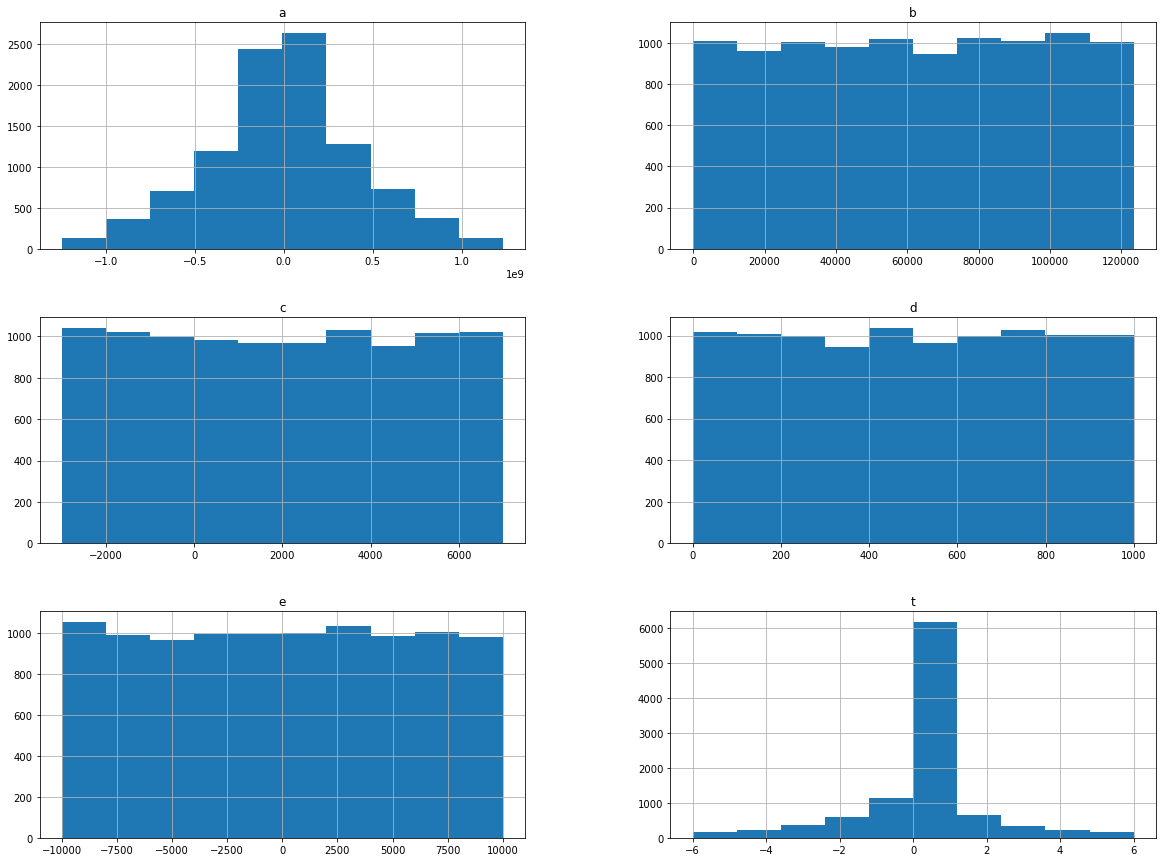

In [3]:
# Histograms of data
dataset.hist(bins=10, figsize=(20,15))
plt.show()

Scatter matrix of data:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BFF1681BE0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001BFF20EDE48>]], dtype=object)

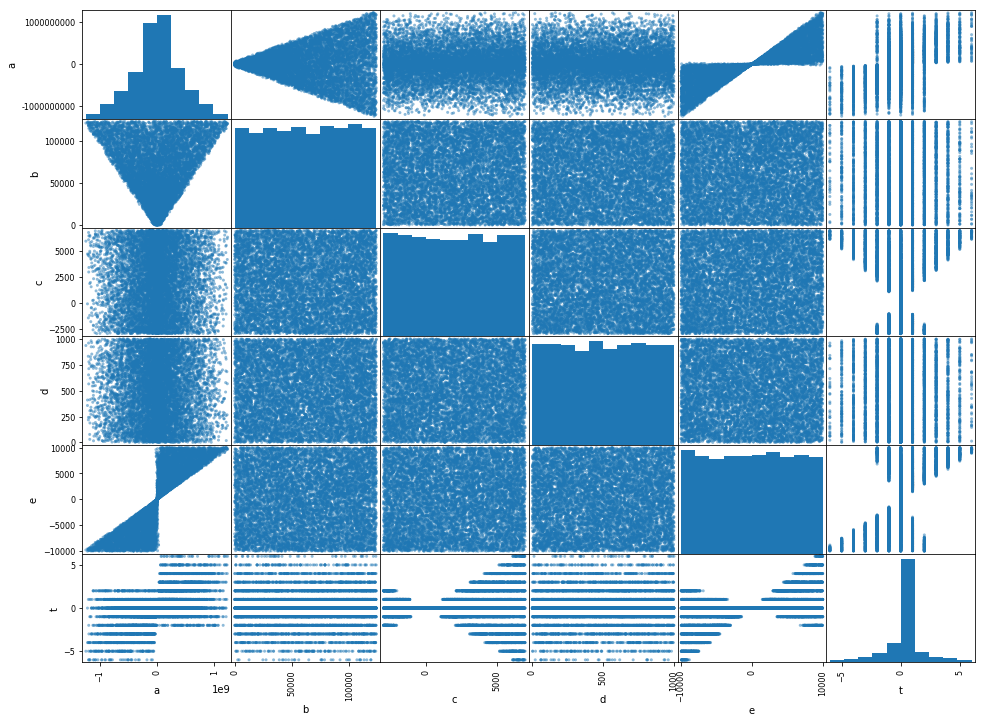

In [4]:
# generate scatter matrix
from pandas.plotting import scatter_matrix

print('Scatter matrix of data:')
scatter_matrix(dataset, figsize=(16, 12))